# using k means clustering 
# using mtcars dataset hosted on amazon S3

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
dataset = pd.read_csv('https://s3.amazonaws.com/elephantscale-public/data/cars/mtcars_header.csv')

In [8]:
dataset

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# now dataset is loaded we have to verctorize them into two vectors  i am going to do it with mpg andno of cylinders

In [64]:
mpg_cyl = dataset[[ "mpg", "cyl"]].copy()
mpg_cyl

,mpg,cyl
0,21.0,6
1,21.0,6
2,22.8,4
3,21.4,6
4,18.7,8
5,18.1,6
6,14.3,8
7,24.4,4
8,22.8,4
9,19.2,6


In [31]:

# Create a new feature vector as a 2D array with values of 'mpg' and 'cyl' columns
featureVector = mpg_cyl[['mpg', 'cyl']].values

# Add the new feature vector as a column to the DataFrame using .loc
# Here, we will add each column of the feature vector separately
mpg_cyl.loc[:, 'mpg_cyl_vector'] = list(featureVector)


# starting k means with 2 clusters

In [35]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)


model = kmeans.fit(featureVector)

wcss = model.inertia_

print(wcss)

429.1827428571428


# wcss is nto particularly good it should be small as possible so we do hyperpramter tuning ing k

In [36]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

In [37]:
cluster_labels = model.labels_

# Add the cluster labels as a new column to the original dataset
dataset['cluster_labels'] = cluster_labels

In [38]:
dataset

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster_labels
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1


In [39]:
k = 3
wcss = KMeans(n_clusters=k, random_state=0).fit(featureVector).inertia_
print('WCSS: ' + str(wcss))

WSSSE: 181.15828409090906


# hyperparameter tuining

In [51]:
kvals = []
WCSSs = []

# Run k from 2 to 32
for k in range(1,32):
    wcss = KMeans(n_clusters=k, random_state=0).fit(featureVector).inertia_
    print ("k={},  WCSS={}".format(k,wcss))
    kvals.append(k)
    WCSSs.append(wcss)
# creating a dataframe wit hhthe gotten kvals and wcss
df = pd.DataFrame({'k': kvals, 'wcss':WCSSs})
df

k=1,  WCSS=1224.9221875
k=2,  WCSS=429.1827428571428
k=3,  WCSS=181.15828409090906
k=4,  WCSS=107.64864285714285
k=5,  WCSS=70.12786507936508
k=6,  WCSS=54.20988888888886
k=7,  WCSS=38.90122222222221
k=8,  WCSS=29.870142857142845
k=9,  WCSS=19.927166666666658
k=10,  WCSS=17.469666666666665
k=11,  WCSS=13.059666666666665
k=12,  WCSS=10.224666666666666
k=13,  WCSS=5.968333333333332
k=14,  WCSS=4.261666666666669
k=15,  WCSS=3.1366666666666694
k=16,  WCSS=2.12866666666667
k=17,  WCSS=1.2836666666666687
k=18,  WCSS=0.8786666666666668
k=19,  WCSS=0.7720000000000009
k=20,  WCSS=0.45166666666666644
k=21,  WCSS=0.3083333333333324
k=22,  WCSS=0.2016666666666665
k=23,  WCSS=0.12166666666666705
k=24,  WCSS=0.07666666666666684
k=25,  WCSS=0.03166666666666662
k=26,  WCSS=0.005000000000000142
k=27,  WCSS=0.0
k=28,  WCSS=0.0
k=29,  WCSS=0.0
k=30,  WCSS=0.0
k=31,  WCSS=0.0


C:\Users\Rustam Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rustam Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rustam Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rustam Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (27)

,k,wcss
0,1,1224.922188
1,2,429.182743
2,3,181.158284
3,4,107.648643
4,5,70.127865
5,6,54.209889
6,7,38.901222
7,8,29.870143
8,9,19.927167
9,10,17.469667


Text(0, 0.5, 'WCSS')

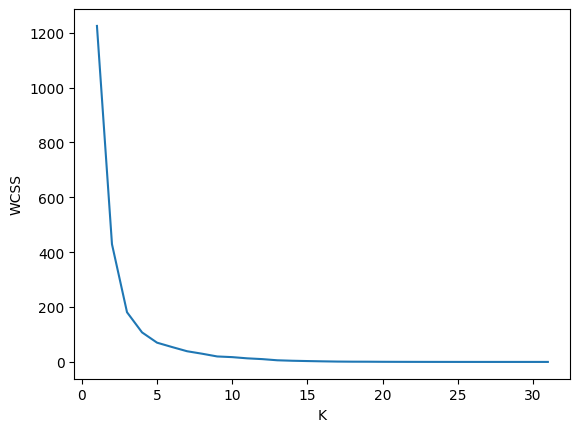

In [47]:
plt.plot(kvals,WCSSs)
plt.xlabel("K")
plt.ylabel("WCSS")

i will pick k=10 as we cee small bend of diminishing optimization and do the tuning

In [92]:
k = 10
wcss = KMeans(n_clusters=k, random_state=0).fit(featureVector).inertia_
print('WCSS: ' + str(wcss))

WCSS: 17.469666666666665


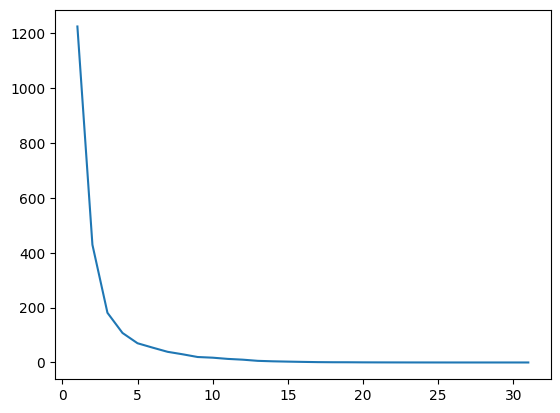

In [89]:
plt.plot(df['k'],df['wcss'])

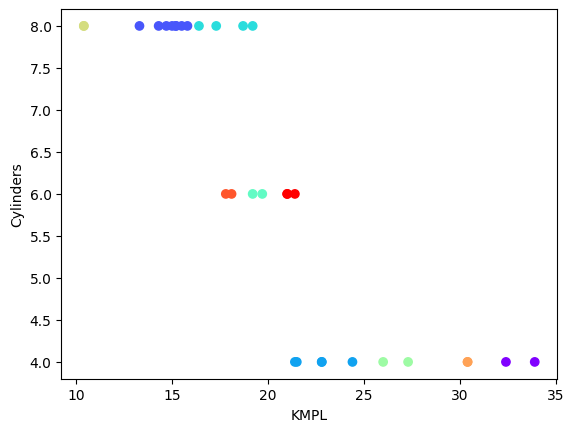

In [102]:
# Create a new feature vector as a 2D array with values of 'mpg' and 'cyl' columns
featureVector = mpg_cyl[['mpg', 'cyl']].values

# Apply KMeans clustering with k=2
k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
model = kmeans.fit(featureVector)

# Get the cluster labels
cluster_labels = model.labels_

# Add the cluster labels as a new column to the original dataset
dataset['cluster_labels'] = cluster_labels

# Plotting the clusters using cluster labels
plt.scatter(mpg_cyl['mpg'], mpg_cyl['cyl'], c=cluster_labels, cmap='rainbow')
plt.xlabel("KMPL")
plt.ylabel("Cylinders")
plt.show()

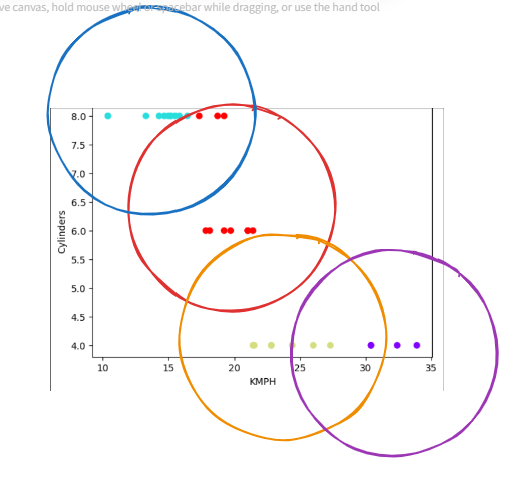
# if categroirzed with 4 clusters
* red : fuel inefficient more cylinder 
* yellow: moderately efficient with less cylinder
* blue: moderately efficient with more cylinder
* purple: higyly fuel efficient with less cylinder